In [152]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data from companies
companies = pd.read_csv("E:/AIML/CaseStudy1/companies.txt", sep="\t", encoding = "ISO-8859-1")

# convert to lower case
companies = companies.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


In [153]:
# Unique companies
companies_len = len(companies['permalink'].unique().tolist())
print("No of Unique Companies:", companies_len)

No of Unique Companies: 66368


In [154]:
# read data from rounds2
rounds2 = pd.read_csv("E:/AIML/CaseStudy1/rounds2.csv", encoding = "ISO-8859-1")
# convert to lower case
rounds2 = rounds2.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


In [155]:
# Unique companies in round2
rounds2_len = len(rounds2['company_permalink'].unique().tolist())
print("No of Unique Companies:", rounds2_len)

No of Unique Companies: 66370


In [156]:
# companies in round2 not present in companies
companies_not_in_rounds2=rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]
print("Companies not in round2:", companies_not_in_rounds2.count())

Companies not in round2: company_permalink          7
funding_round_permalink    7
funding_round_type         7
funding_round_code         1
funded_at                  7
raised_amount_usd          1
dtype: int64


In [157]:
# rename company column name before merging 
companies.rename(columns={'permalink':'company_permalink'}, inplace=True)
# merge the dataframe to add a categorical variable 
master_frame = pd.merge(companies, rounds2, how='inner', on='company_permalink')
master_frame.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


In [158]:
# observation in master frame 
print("master_frame Rows:", master_frame.count())

master_frame Rows: company_permalink          114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
funding_round_permalink    114942
funding_round_type         114942
funding_round_code          31139
funded_at                  114942
raised_amount_usd           94958
dtype: int64


In [159]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [160]:
# rows having at least one missing value
master_frame.isnull().any(axis=1)

0          True
1          True
2          True
3          True
4         False
5          True
6          True
7          True
8          True
9          True
10        False
11         True
12        False
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28        False
29         True
          ...  
114912     True
114913    False
114914     True
114915     True
114916     True
114917     True
114918     True
114919     True
114920     True
114921     True
114922     True
114923     True
114924    False
114925     True
114926     True
114927     True
114928     True
114929     True
114930    False
114931     True
114932     True
114933     True
114934     True
114935     True
114936     True
114937     True
114938     True
114939     True
114940     True
114941     True
Length: 114942, dtype: b

In [161]:
# sum it up to check how many rows have all missing values
master_frame.isnull().all(axis=1).sum()

0

In [162]:
# sum of misisng values in each row
master_frame.isnull().sum(axis=1)

0         1
1         1
2         1
3         5
4         0
5         2
6         3
7         1
8         1
9         1
10        0
11        1
12        0
13        1
14        2
15        1
16        1
17        4
18        2
19        2
20        1
21        1
22        1
23        2
24        1
25        1
26        1
27        1
28        0
29        1
         ..
114912    1
114913    0
114914    1
114915    1
114916    1
114917    1
114918    1
114919    1
114920    2
114921    1
114922    1
114923    1
114924    0
114925    2
114926    2
114927    2
114928    2
114929    1
114930    0
114931    1
114932    1
114933    1
114934    1
114935    1
114936    1
114937    1
114938    1
114939    6
114940    1
114941    6
Length: 114942, dtype: int64

In [163]:
# removing the two columns which is not required
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [164]:
# summing up the missing values (column-wise)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [165]:
# count the number of rows having > 5 missing values
len(master_frame[master_frame.isnull().sum(axis=1) > 3].index)

8962

In [166]:
# calculate the percentage
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 3].index) / len(master_frame.index))

7.796975866088984

In [167]:
# retaining the rows having <= 3 NaNs
master_frame = master_frame[master_frame.isnull().sum(axis=1) <= 3]
# look at the summary again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
name                        0.00
homepage_url                4.22
category_list               1.61
status                      0.00
country_code                0.00
state_code                  1.87
region                      1.13
city                        1.13
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          15.97
dtype: float64

In [168]:
# removing NaN raised amount rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
name                       0.00
homepage_url               3.74
category_list              0.64
status                     0.00
country_code               0.00
state_code                 1.90
region                     1.28
city                       1.28
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [169]:
# funding type data 
df_by_segment = master_frame.groupby('funding_round_type')
# funding type mean
avg_fund_amt=df_by_segment['raised_amount_usd'].mean()
# coverting in decimals
avg_fund_amt.apply(lambda x: '{:.2f}'.format(x))

funding_round_type
angel                       968283.02
convertible_note           1332925.90
debt_financing            17191602.67
equity_crowdfunding         511397.27
grant                      4512938.86
non_equity_assistance       471445.86
post_ipo_debt            169451789.77
post_ipo_equity           66018794.26
private_equity            73604178.97
product_crowdfunding       1489682.00
secondary_market          81527203.55
seed                        748081.16
undisclosed               15810998.15
venture                   11738739.30
Name: raised_amount_usd, dtype: object

In [170]:
# funding type sum
sum_fund_amt=df_by_segment['raised_amount_usd'].sum()
# coverting in decimals
sum_fund_amt.apply(lambda x: '{:.2f}'.format(x))
sum_fund_amt
#print(type(sum_fund_amt))

funding_round_type
angel                    4.284652e+09
convertible_note         1.766127e+09
debt_financing           1.122784e+11
equity_crowdfunding      5.804359e+08
grant                    8.922080e+09
non_equity_assistance    2.970109e+07
post_ipo_debt            2.558722e+10
post_ipo_equity          3.967730e+10
private_equity           1.349901e+11
product_crowdfunding     4.945744e+08
secondary_market         2.364289e+09
seed                     1.587428e+10
undisclosed              2.136066e+10
venture                  5.643634e+11
Name: raised_amount_usd, dtype: float64

In [171]:
# investment between 5-15 million in fund
avg_fund_amt_oppr = pd.DataFrame({'funding_type':avg_fund_amt.index, 'funding_amount':avg_fund_amt.values})
avg_fund_amt_oppr = avg_fund_amt_oppr[(avg_fund_amt_oppr.funding_amount>5000000) & (avg_fund_amt_oppr.funding_amount <15000000)]
fund_type = avg_fund_amt_oppr.iloc[0]['funding_type']
fund_type

'venture'

In [172]:
# finding top 3 english speaking country for venture fund
df_by_country_segment = master_frame.groupby(['funding_round_type','country_code'])
sum_fund_country_amt=df_by_country_segment['raised_amount_usd'].sum().reset_index(name='funding_amount')
sum_fund_amt_oppr_country = pd.DataFrame(data=sum_fund_country_amt)

sum_fund_amt_oppr_country = sum_fund_amt_oppr_country[sum_fund_amt_oppr_country.funding_round_type==fund_type]
sum_fund_amt_oppr_country = sum_fund_amt_oppr_country.sort_values(['funding_amount'], ascending=False)
sum_fund_amt_oppr_country= sum_fund_amt_oppr_country[(sum_fund_amt_oppr_country['country_code'] != 'fra') & 
                                                     (sum_fund_amt_oppr_country['country_code'] != 'isr') & 
                                                     (sum_fund_amt_oppr_country['country_code'] != 'deu') & 
                                                     (sum_fund_amt_oppr_country['country_code'] != 'swe') & 
                                                     (sum_fund_amt_oppr_country['country_code'] != 'jpn') &
                                                     (sum_fund_amt_oppr_country['country_code'] != 'chn') & 
                                                     (sum_fund_amt_oppr_country['country_code']!='che') & 
                                                     (sum_fund_amt_oppr_country['country_code']!='nld')&
                                                    (sum_fund_amt_oppr_country['country_code'] != 'esp')&
                                                    (sum_fund_amt_oppr_country['country_code'] != 'bra')&
                                                    (sum_fund_amt_oppr_country['country_code'] != 'rus')&
                                                    (sum_fund_amt_oppr_country['country_code'] != 'dnk') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'fin') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'nor') & 
                                                    (sum_fund_amt_oppr_country['country_code'] != 'bel') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'mys') & 
                                                    (sum_fund_amt_oppr_country['country_code'] != 'kor') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'hkg') & 
                                                    (sum_fund_amt_oppr_country['country_code'] != 'twn') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'tur') & 
                                                    (sum_fund_amt_oppr_country['country_code'] != 'aut') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'ita') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'lux') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'are') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'idn')&
                                                    (sum_fund_amt_oppr_country['country_code'] != 'arg') &
                                                    (sum_fund_amt_oppr_country['country_code'] != 'egy')]
sum_fund_amt_oppr_country.head(9)

,funding_round_type,country_code,funding_amount
688,venture,usa,4.225058e+11
623,venture,gbr,2.017691e+10
633,venture,ind,1.433936e+10
606,venture,can,9.583332e+09
675,venture,sgp,2.793918e+09
634,venture,irl,1.676131e+09
597,venture,aus,1.322935e+09
663,venture,nzl,4.483164e+08
603,venture,bmu,2.888000e+08


In [173]:
# Top 3 english speaking country
#master_frame_usa_venture_new =master_frame_usa_venture.main_sector.value_counts()
master_frame_top3_country =sum_fund_amt_oppr_country.head(3)
master_frame_top3_country = master_frame_top3_country['country_code']
print(master_frame_top3_country)

688    usa
623    gbr
633    ind
Name: country_code, dtype: object


In [174]:
# reading primary sector, main sector mapping file
category_list_primary_sector_mapping = pd.read_csv("E:/AIML/CaseStudy1/mapping.csv", encoding = "ISO-8859-1")
category_list_primary_sector_mapping = category_list_primary_sector_mapping[category_list_primary_sector_mapping.category_list.notnull()]
category_list_primary_sector_mapping = category_list_primary_sector_mapping.drop(['Blanks'], axis=1)
category_list_primary_sector_mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [175]:
#Drop Blanks column as it is not any of the main sector from mapping
df = category_list_primary_sector_mapping.drop('category_list', axis=1)
df['main_sector'] = df.idxmax(axis=1)
# picking up the main sector
col = ['main_sector']
df = df[col]
df.head()

,main_sector
1,Manufacturing
2,Manufacturing
3,Manufacturing
4,"Social, Finance, Analytics, Advertising"
5,Health


In [176]:
# building the category list and main sector dataframe
category_list_primary_sector_mapping = category_list_primary_sector_mapping.join(df, how='inner')
category_list_primary_sector_mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health


In [177]:
# Keeping only the category list and main sector dataframe
category_list_primary_sector_mapping = category_list_primary_sector_mapping.filter(['category_list', 'main_sector'], axis=1)
category_list_primary_sector_mapping = category_list_primary_sector_mapping.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
category_list_primary_sector_mapping.rename(columns={'category_list':'primary_sector'}, inplace=True)
category_list_primary_sector_mapping.head()

,primary_sector,main_sector
1,3d,manufacturing
2,3d printing,manufacturing
3,3d technology,manufacturing
4,accounting,"social, finance, analytics, advertising"
5,active lifestyle,health


In [178]:
#extracting primary sector from category_ist
master_frame['category_list'] = master_frame['category_list'].astype(str)
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
2,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,application platforms
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web
6,/organization/01games-technology,01games technology,http://www.01games.hk/,games,operating,hkg,NaN,hong kong,hong kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,games
7,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,biotechnology
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology
9,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,analytics
10,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
12,/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics


In [179]:
#merge master_frame and merged_mapping
master_frame = pd.merge(master_frame, category_list_primary_sector_mapping, how='inner', on='primary_sector')
master_frame_allmainsec=master_frame
master_frame_allmainsec

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,entertainment
1,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,entertainment
2,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,entertainment
3,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,entertainment
4,/organization/a-dance-for-me,a dance for me,http://www.adanceforme.com/,media|news|photo sharing|video,operating,usa,mt,missoula,missoula,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1090000.0,media,entertainment
5,/organization/akira-mobile,akira mobile,http://www.akira.lt/en,media|mobile|sms|telecommunications,operating,ltu,NaN,NaN,NaN,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,01-08-2012,18410.0,media,entertainment
6,/organization/all-day-media,all day media,http://allday.com/,media|social media,operating,usa,ca,los angeles,los angeles,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.0,media,entertainment
7,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,entertainment
8,/organization/america-s-real-deal,america's real deal,http://americasrealdeal.com/,media|news,operating,usa,ut,salt lake city,bountiful,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,19-08-2011,670000.0,media,entertainment
9,/organization/american-gnuity,american gnuity,http://americangnuity.com,media|news,operating,usa,ut,salt lake city,bountiful,/funding-round/07cc3eb3afd8ef5812e2b62b254b2040,equity_crowdfunding,19-08-2011,670000.0,media,entertainment


In [180]:
master_frame_usa_venture = master_frame[(master_frame['country_code'] == 'usa') & (master_frame['funding_round_type'] =='venture') & 
                  (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
master_frame_usa_venture_count_sum = master_frame_usa_venture.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
master_frame_usa_venture_count_sum = master_frame_usa_venture_count_sum.sort_values(['count'],ascending=False)
master_frame_usa_venture_count_sum

,sum,count
main_sector,,
others,2.153428e+10,2400
cleantech / semiconductors,1.779600e+10,1950
"social, finance, analytics, advertising",1.359070e+10,1550
"news, search and messaging",1.107682e+10,1265
health,6.855859e+09,759
manufacturing,6.228553e+09,691
entertainment,4.040213e+09,470
automotive & sports,1.269104e+09,142


In [181]:
#"Total no of Investment: " master_frame_usa_venture
print('Total no of Investment count:', master_frame_usa_venture['company_permalink'].count())
#"Total no of Investment: count" 
print('Total amount of investment (USD):', master_frame_usa_venture['raised_amount_usd'].sum())
#"Top Sector name (no. of investment-wise) count"
print('Top Sector name (no. of investment-wise):', master_frame_usa_venture.main_sector.value_counts())
master_frame_usa_venture_new =master_frame_usa_venture.main_sector.value_counts()
master_frame_usa_top3_count =master_frame_usa_venture_new.head(3)
print(master_frame_usa_top3_count)

Total no of Investment count: 9227
Total amount of investment (USD): 82391524549.0
Top Sector name (no. of investment-wise): others                                     2400
cleantech / semiconductors                 1950
social, finance, analytics, advertising    1550
news, search and messaging                 1265
health                                      759
manufacturing                               691
entertainment                               470
automotive & sports                         142
Name: main_sector, dtype: int64
others                                     2400
cleantech / semiconductors                 1950
social, finance, analytics, advertising    1550
Name: main_sector, dtype: int64
<class 'pandas.core.series.Series'>


In [182]:
print('For the top sector count-wise (point 3), which company received the highest investment?')
D1_Top3_df = master_frame_usa_venture[master_frame_usa_venture['main_sector'] == 'others']
D1_Top3_df = D1_Top3_df.sort_values(['raised_amount_usd'], ascending=False)
D1_Top3_df.head(3)

For the top sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
37633,/organization/spidercloud-wireless,spidercloud wireless,http://www.spidercloud.com,enterprise software,operating,usa,ca,sf bay area,san jose,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,06-01-2015,14999999.0,enterprise software,others
60808,/organization/onstor,onstor,http://www.onstor.com,web hosting,acquired,usa,ca,sf bay area,campbell,/funding-round/2b3c1d1a478c1562088c1f49fec1485c,venture,18-04-2008,14800000.0,web hosting,others
64818,/organization/redfin,redfin,http://redfin.com,real estate,operating,usa,wa,seattle,seattle,/funding-round/8971121cb6408b7cbbb1f7781a7619ba,venture,27-10-2011,14800000.0,real estate,others


In [183]:
print('For the top 2nd sector count-wise (point 3), which company received the highest investment?')
D1_Second3_df = master_frame_usa_venture[master_frame_usa_venture['main_sector'] == 'cleantech / semiconductors']
D1_Second3_df = D1_Second3_df.sort_values(['raised_amount_usd'], ascending=False)
D1_Second3_df.head(3)

For the top 2nd sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
59767,/organization/intermolecular,intermolecular,http://www.intermolecular.com,semiconductors,ipo,usa,ca,sf bay area,san jose,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,10-03-2011,14999999.0,semiconductors,cleantech / semiconductors
60380,/organization/zenverge,zenverge,http://www.zenverge.com,semiconductors,acquired,usa,ca,sf bay area,cupertino,/funding-round/f6f427e7f16677297e285205fafd351d,venture,31-10-2007,14999999.0,semiconductors,cleantech / semiconductors
12574,/organization/revision-optics,revision optics,http://www.revisionoptics.com,biotechnology,operating,usa,ca,anaheim,lake forest,/funding-round/956095f09c2840edc99d78978e242c02,venture,16-04-2013,14999998.0,biotechnology,cleantech / semiconductors


In [184]:
master_frame_gbr_venture = master_frame[(master_frame['country_code'] == 'gbr') & (master_frame['funding_round_type'] =='venture') & 
                  (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
master_frame_gbr_venture_count_sum = master_frame_gbr_venture.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
master_frame_gbr_venture_count_sum = master_frame_gbr_venture_count_sum.sort_values(['count'],ascending=False)
master_frame_gbr_venture_count_sum

,sum,count
main_sector,,
others,1.094124e+09,126
cleantech / semiconductors,1.096905e+09,123
"social, finance, analytics, advertising",7.568884e+08,89
"news, search and messaging",5.657462e+08,65
entertainment,4.015111e+08,46
manufacturing,3.319403e+08,38
health,2.095375e+08,23
automotive & sports,1.370516e+08,14


In [185]:
#"Total no of Investment: " master_frame_gbr_venture
print('Total no of Investment count:', master_frame_gbr_venture['company_permalink'].count())
#"Total no of Investment: count" 
print('Total amount of investment (USD):', master_frame_gbr_venture['raised_amount_usd'].sum())
#"Top Sector name (no. of investment-wise) count"
print('Top Sector name (no. of investment-wise):', master_frame_gbr_venture.main_sector.value_counts())
master_frame_gbr_venture_new['counts'] =master_frame_gbr_venture.main_sector.value_counts()
master_frame_gbr_top3_count =master_frame_gbr_venture_new.head(3)
print(master_frame_gbr_top3_count)

Total no of Investment count: 524
Total amount of investment (USD): 4593704358.0
Top Sector name (no. of investment-wise): others                                     126
cleantech / semiconductors                 123
social, finance, analytics, advertising     89
news, search and messaging                  65
entertainment                               46
manufacturing                               38
health                                      23
automotive & sports                         14
Name: main_sector, dtype: int64
others                                     126
cleantech / semiconductors                 123
social, finance, analytics, advertising     89
Name: main_sector, dtype: object
<class 'pandas.core.series.Series'>


In [186]:
print('For the top sector count-wise (point 3), which company received the highest investment?')
D2_Top3_df = master_frame_gbr_venture[master_frame_gbr_venture['main_sector'] == 'others']
D2_Top3_df = D2_Top3_df.sort_values(['raised_amount_usd'], ascending=False)
D2_Top3_df.head(3)

For the top sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
19202,/organization/myoptique-group,myoptique group,http://myoptiquegroup.com,e-commerce,operating,gbr,h9,london,london,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,21-04-2009,14656237.0,e-commerce,others
20427,/organization/ukash,kaliteukash,http://www.kaliteukash.com,e-commerce|finance|fintech|p2p money transfer|...,operating,gbr,h9,london,london,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,29-09-2008,14400000.0,e-commerce,others
19315,/organization/ocapo,ocapo,NaN,e-commerce,operating,gbr,h9,london,london,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,04-07-2013,14394888.0,e-commerce,others


In [187]:
print('For the top 2nd sector count-wise (point 3), which company received the highest investment?')
D2_Second3_df = master_frame_gbr_venture[master_frame_gbr_venture['main_sector'] == 'cleantech / semiconductors']
D2_Second3_df = D2_Second3_df.sort_values(['raised_amount_usd'], ascending=False)
D2_Second3_df.head(3)

For the top 2nd sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
11432,/organization/onyvax,onyvax,http://www.onyvax.com,biotechnology,operating,gbr,m3,bradford,bradford,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,08-05-2006,14906222.0,biotechnology,cleantech / semiconductors
10120,/organization/lectus-therapeutics,lectus therapeutics,http://www.lectustherapeutics.com,biotechnology,closed,gbr,c3,london,cambridge,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,13-02-2006,14257949.0,biotechnology,cleantech / semiconductors
60363,/organization/xmos,xmos,http://www.xmos.com,semiconductors,operating,gbr,b7,bristol,bristol,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,03-12-2013,14000000.0,semiconductors,cleantech / semiconductors


In [188]:
master_frame_ind_venture = master_frame[(master_frame['country_code'] == 'ind') & (master_frame['funding_round_type'] =='venture') & 
                  (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
master_frame_ind_venture_count_sum = master_frame_ind_venture.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
master_frame_ind_venture_count_sum = master_frame_gbr_venture_count_sum.sort_values(['count'],ascending=False)
master_frame_ind_venture_count_sum

,sum,count
main_sector,,
others,1.094124e+09,126
cleantech / semiconductors,1.096905e+09,123
"social, finance, analytics, advertising",7.568884e+08,89
"news, search and messaging",5.657462e+08,65
entertainment,4.015111e+08,46
manufacturing,3.319403e+08,38
health,2.095375e+08,23
automotive & sports,1.370516e+08,14


In [189]:
#"Total no of Investment: " master_frame_gbr_venture
print('Total no of Investment count:', master_frame_ind_venture['company_permalink'].count())
#"Total no of Investment: count" 
print('Total amount of investment (USD):', master_frame_ind_venture['raised_amount_usd'].sum())
#"Top Sector name (no. of investment-wise) count"
print('Top Sector name (no. of investment-wise):', master_frame_ind_venture.main_sector.value_counts())
master_frame_ind_venture_new =master_frame_ind_venture.main_sector.value_counts()
master_frame_ind_top3_count =master_frame_ind_venture_new.head(3)
print(master_frame_ind_top3_count)

Total no of Investment count: 222
Total amount of investment (USD): 1998537552.0
Top Sector name (no. of investment-wise): others                                     77
news, search and messaging                 41
social, finance, analytics, advertising    25
entertainment                              23
manufacturing                              18
health                                     17
cleantech / semiconductors                 14
automotive & sports                         7
Name: main_sector, dtype: int64
others                                     77
news, search and messaging                 41
social, finance, analytics, advertising    25
Name: main_sector, dtype: int64


In [190]:
print('For the top sector count-wise (point 3), which company received the highest investment?')
D3_Top3_df = master_frame_ind_venture[master_frame_ind_venture['main_sector'] == 'others']
D3_Top3_df = D3_Top3_df.sort_values(['raised_amount_usd'], ascending=False)
D3_Top3_df.head(3)

For the top sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
31537,/organization/eximsoft-trianz,eximsoft-trianz,http://www.trianz.com,software,acquired,ind,19,bangalore,bangalore,/funding-round/4bb3bc5f0a816ef3040944eb4632924d,venture,16-01-2007,14000000.0,software,others
18229,/organization/firstcry-com,firstcry.com,http://www.firstcry.com,e-commerce,operating,ind,16,pune,pune,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,13-02-2012,14000000.0,e-commerce,others
18534,/organization/homeshop18,homeshop18,http://www.homeshop18.com,e-commerce|online shopping|retail,closed,ind,36,new delhi,noida,/funding-round/13f564f6635df96481e81f18528ce90a,venture,23-10-2013,14000000.0,e-commerce,others


In [191]:
print('For the top 2nd sector count-wise (point 3), which company received the highest investment?')
D3_Second3_df = master_frame_ind_venture[master_frame_ind_venture['main_sector'] == 'news, search and messaging']
D3_Second3_df = D3_Second3_df.sort_values(['raised_amount_usd'], ascending=False)
D3_Second3_df.head(3)

For the top 2nd sector count-wise (point 3), which company received the highest investment?


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
55761,/organization/hike,hike,http://get.hike.in,messaging|mobile,operating,ind,7,new delhi,new delhi,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,31-03-2014,14000000.0,messaging,"news, search and messaging"
15462,/organization/imimobile,imimobile,http://openhouse.imimobile.com,mobile,ipo,ind,2,hyderabad,hyderabad,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,13-11-2009,13000000.0,mobile,"news, search and messaging"
15397,/organization/gupshup-technology-india-pvt-ltd,gupshup,http://gupshup.me,mobile,operating,ind,16,mumbai,mumbai,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,02-03-2010,12000000.0,mobile,"news, search and messaging"


In [192]:
# selecting master data for venture, seed, private_equity
master_frame_new = master_frame[master_frame['funding_round_type'].isin(['venture','seed','private_equity'])]
master_frame_new

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,entertainment
1,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,entertainment
2,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,entertainment
3,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,entertainment
5,/organization/akira-mobile,akira mobile,http://www.akira.lt/en,media|mobile|sms|telecommunications,operating,ltu,NaN,NaN,NaN,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,01-08-2012,18410.0,media,entertainment
6,/organization/all-day-media,all day media,http://allday.com/,media|social media,operating,usa,ca,los angeles,los angeles,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.0,media,entertainment
7,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,entertainment
10,/organization/anthill-magazine,anthill magazine,http://anthillonline.com/,media,operating,aus,7,melbourne,melbourne,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.0,media,entertainment
11,/organization/audiosocket,audiosocket,http://audiosocket.com,media|music|technology,operating,usa,wa,seattle,seattle,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,media,entertainment
12,/organization/audiosocket,audiosocket,http://audiosocket.com,media|music|technology,operating,usa,wa,seattle,seattle,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,media,entertainment


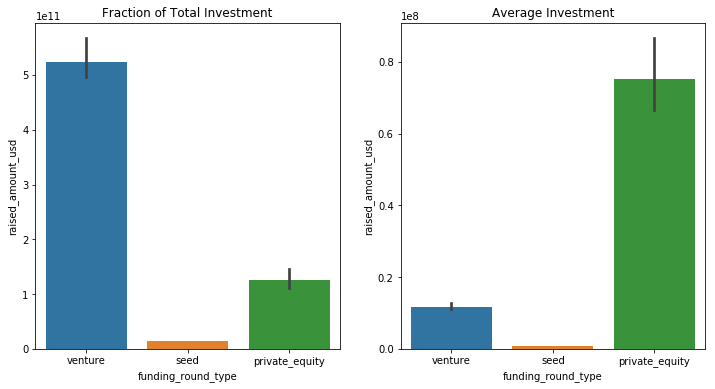

In [193]:
# increase figure size 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_new, estimator=np.sum)
plt.title("Fraction of Total Investment")

# bar plot with default statistic=mean
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_new)
plt.title("Average Investment")
plt.show()

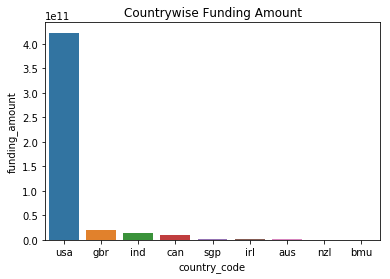

In [198]:
#pd.set_option('float_format', '{:f}'.format)
sum_fund_amt_top9_country = sum_fund_amt_oppr_country.head(9)
sns.barplot(x='country_code', y='funding_amount', data=sum_fund_amt_top9_country)
plt.title("Countrywise Funding Amount")
plt.show()

In [199]:
top3_mainsector_count_merge = pd.concat([master_frame_usa_top3_count, master_frame_gbr_top3_count, master_frame_ind_top3_count], axis=0).reset_index(name='NoOfInvestment')
country = ['usa','usa','usa','gbr','gbr','gbr','ind','ind','ind']
top3_mainsector_count_merge['Country'] = country
top3_mainsector_count_merge=top3_mainsector_count_merge.rename(columns = {'index':'MainSector'})
top3_mainsector_count_merge

,MainSector,NoOfInvestment,Country
0,others,2400,usa
1,cleantech / semiconductors,1950,usa
2,"social, finance, analytics, advertising",1550,usa
3,others,126,gbr
4,cleantech / semiconductors,123,gbr
5,"social, finance, analytics, advertising",89,gbr
6,others,77,ind
7,"news, search and messaging",41,ind
8,"social, finance, analytics, advertising",25,ind


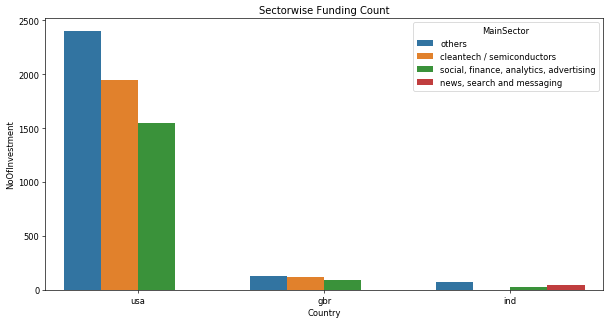

In [200]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 6), dpi=60, facecolor='w', edgecolor='k')
#plt.ylim(1, 400)
# specify hue="categorical_variable"
sns.barplot(x='Country', y='NoOfInvestment', hue="MainSector", data=top3_mainsector_count_merge)
plt.title("Sectorwise Funding Count")
plt.show()